In [1]:
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
import matplotlib.pylab as plt
from skimage import metrics
import cv2
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from math import pi

In [2]:
width = 35.8
resolution = 6000
delta = (width / resolution)

In [3]:
freq_diskr = 0.00366772681*100
phase = 0

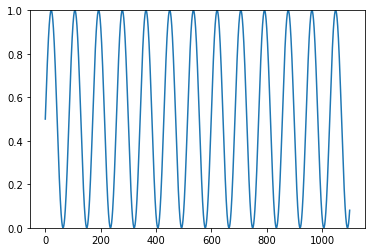

In [4]:
#Функция создания сигнала в виде синусоиды с возможность изменять частоту и сдвигать по фазе. Значения синусоиды в интервале [0; 1].
def generate_sinusoid(x, frequency):
  return(0.5 + 0.5 * np.sin(x * frequency + phase))

#Функция, дискретизирующая сигнал с заданной частотой.
def discr_sign(frequency):
  arr = np.array([])
  for i in np.arange(0, freq_diskr*3000, freq_diskr):
      arr = np.append(arr, generate_sinusoid(i, frequency))
  return arr

#Функция, которая создает изображение из дискретизированного сигнала.
def image(frequency):
  x=np.arange(0,freq_diskr*3000,freq_diskr)
  plt.plot(x, generate_sinusoid(x, frequency))
  # plt.xlim(0,300)
  plt.ylim(0,1)
  plt.show()

image(freq_diskr / 5)

In [5]:
#@title Параметры { run: "auto" }
low = 0#@param {type:"number"}

upper = 1#@param {type:"number"}
level = 32#@param {type:"number"}

In [6]:
def image(p):
    p = p * 255
    image = np.full((len(p), len(p)), fill_value=p)
    plt.imshow(image, cmap="gray")
    return image

In [7]:
def quant(b, low, upper, level): # квантование
    A = []
    levels = []
    while low <= upper:
        levels.append(low)
        low += 1 / level

    print(levels)
    for i in b:
       for j in range(len(levels)):
           if i < levels[j]:
                if i < (levels[j-1] + levels[j]) / 2:
                    A.append(levels[j-1])
                    break
                else:
                    A.append(levels[j])
                    break
    return np.array(A)



[0, 0.03125, 0.0625, 0.09375, 0.125, 0.15625, 0.1875, 0.21875, 0.25, 0.28125, 0.3125, 0.34375, 0.375, 0.40625, 0.4375, 0.46875, 0.5, 0.53125, 0.5625, 0.59375, 0.625, 0.65625, 0.6875, 0.71875, 0.75, 0.78125, 0.8125, 0.84375, 0.875, 0.90625, 0.9375, 0.96875, 1.0]
(3000, 3000)
0.0195
41.1617
0.9485


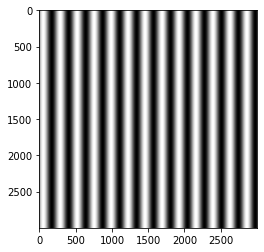

In [8]:
N = quant(discr_sign(freq_diskr / 5), low, upper, level)
picQ = image(N)
print (picQ.shape)

pic = image(discr_sign(freq_diskr / 5))
pic = np.resize(pic, picQ.shape)

MSE = round(mse(pic,picQ) /255, 4)
print (MSE)

PSNR = round(psnr(pic,picQ, data_range=255), 4)
print(PSNR)

SSIM = round((ssim(pic,picQ, data_range=255)), 4)
print(SSIM)

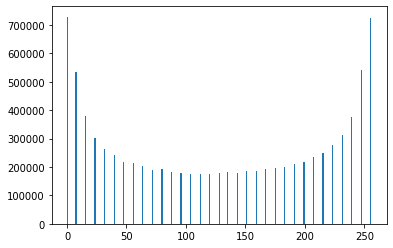

In [9]:
#Гистограмма
plt.hist(picQ.ravel(), 255, [0,256])
plt.show()

In [10]:
def irr_quant(b, low, upper, levels): # неравномерное квантование
    A = []
    # print(levels)
    for i in b:
       for j in range(len(levels)):
           if i < levels[j]:
                if i < (levels[j-1] + levels[j]) / 2:
                    A.append(levels[j-1])
                    break
                else:
                    A.append(levels[j])
                    break
    return np.array(A)

0.0646
35.96
0.9575


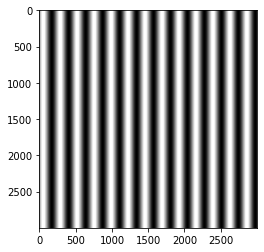

In [11]:

levels = [0, 0.005, 0.0015, 0.02, 0.03, 0.078125, 0.09375, 0.109375, 0.125, 0.140625,
          0.15625, 0.171875, 0.1875, 0.203125, 0.21875, 0.234375, 0.25, 0.265625,
          0.28125, 0.296875, 0.3125, 0.328125, 0.34375, 0.359375, 0.375, 0.390625,
          0.40625, 0.421875, 0.4375, 0.453125, 0.46875, 0.484375, 0.5, 0.515625, 0.53125,
          0.546875, 0.5625, 0.578125, 0.59375, 0.609375, 0.625, 0.640625, 0.65625,
          0.671875, 0.6875, 0.703125, 0.71875, 0.734375, 0.75, 0.765625, 0.78125,
          0.796875, 0.8125, 0.828125, 0.84375, 0.859375, 0.875, 0.890625, 0.90625,
          0.921875, 0.45, 0.45, 0.45, 1.0]
# print(len(levels))

N = irr_quant(discr_sign(freq_diskr / 5), low, upper, levels)
picIQ = image(N)


MSE1 = round(mse(pic, picIQ) / 255, 4)
print (MSE1)

PSNR1 = round(psnr(pic, picIQ, data_range=255), 2)
print(PSNR1)

SSIM1 = round((ssim(pic, picIQ, data_range=255)), 4)
print(SSIM1)